# pynoisy: Ring Model (Noisy "Disk")
---
This notebook plots the advection-diffusion matrices defined by the source C code [1]

The python wrapper pynoisy [2] is introduced and the parameters defined by the disk model (src/model_disk.c) are plotted. pynoisy has a modified verions of [1] which is used to define general matrices as inputs to the advection-diffusion solver. 

[1] https://github.com/AFD-Illinois/noisy

[2] https://github.com/aviadlevis/pynoisy

In [1]:
import pynoisy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

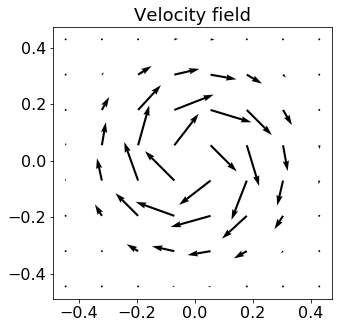

In [2]:
"""
Define an advection xr.dataset and plot the velocity vector field.
"""
advection = pynoisy.advection.disk(direction='cw')
%matplotlib inline
plt.figure(figsize=(5,5))
advection.noisy_methods.plot_velocity()

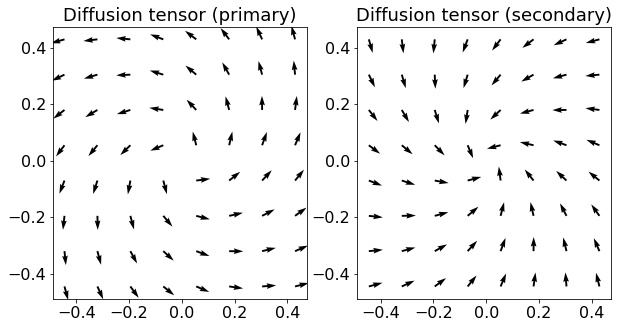

In [3]:
"""
Define a diffusion xr.dataset and plot the principle axis of the diffusion tensor
"""
diffusion = pynoisy.diffusion.ring(opening_angle=np.pi/3)

%matplotlib inline
fig, ax = plt.subplots(1, 2, figsize=(10,5))
plt.sca(ax[0])
diffusion.noisy_methods.plot_principal_axis()
plt.sca(ax[1])
diffusion.noisy_methods.plot_secondary_axis()

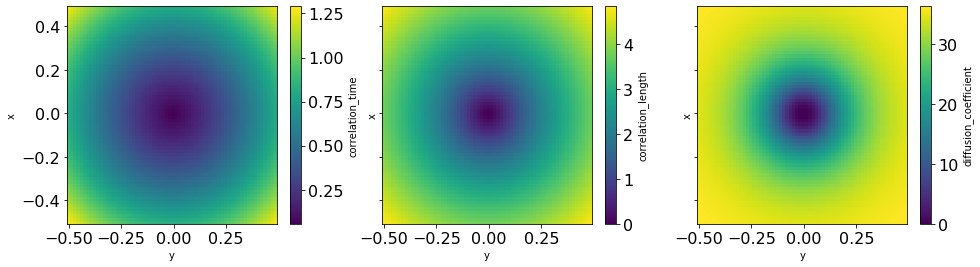

In [4]:
"""
Plot the correlation time and diffusion coefficient
"""
%matplotlib inline
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(16,4))
diffusion.correlation_time.plot(ax=ax[0])
diffusion.correlation_length.plot(ax=ax[1])
diffusion.diffusion_coefficient.plot(ax=ax[2])

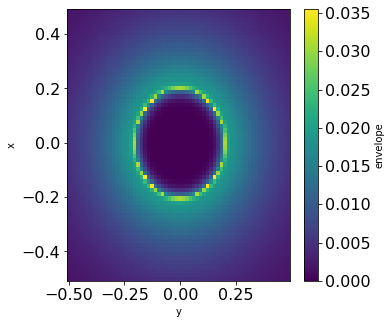

In [5]:
"""
Define and plot the disk envelope function.
The envelope multiplies the actual random fields to create synthetic plots of a "black hole"
"""
envelope = pynoisy.envelope.ring()
%matplotlib inline
plt.figure(figsize=(5,5))
envelope.plot()

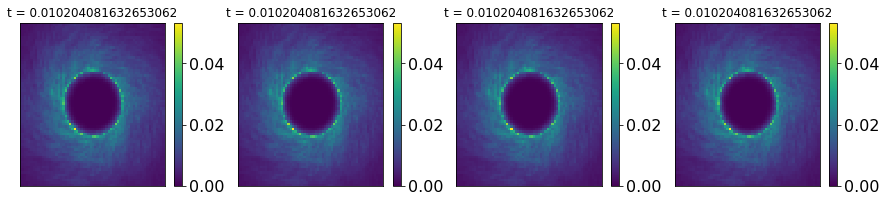

In [6]:
"""
Run Noisy which solves the Advection-Diffusion stochastic PDE.
Plot the first couple of images.
"""
solver = pynoisy.forward.NoisySolver(advection, diffusion, forcing_strength=1.0)
grf = solver.run_asymmetric()

amplitude = 0.05
movie = envelope * np.exp(-amplitude * grf)

%matplotlib inline
fig, ax = plt.subplots(1, 4, sharey=True, figsize=(15,3))
for i in range(4):
    movie.isel(t=5).plot(ax=ax[i])
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)